In [71]:
import pandas as pd  # Pandas for data manipulation


import matplotlib.pyplot as plt  # Matplotlib for data visualization
%matplotlib inline
import numpy as np  # NumPy for numerical operations
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')
import seaborn as sns  # Seaborn for data visualization

# Import machine learning models
from sklearn.naive_bayes import GaussianNB, BernoulliNB  # For binary classification
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors classifier
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.tree import DecisionTreeClassifier  # Decision Tree classifier
from sklearn.linear_model import LogisticRegression  # Logistic Regression classifier
from sklearn.ensemble import GradientBoostingClassifier  # Gradient Boosting classifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder


# Import machine learning evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report


# Import tools for data splitting
from sklearn.model_selection import train_test_split

In [72]:
df = pd.read_csv('C:/Users/GSDS/Desktop/technology_product_sales_data.csv')

In [73]:
df.head()

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
0,5874,Smartphones,Other Brands,312.949668,18,0,2,1,0
1,5875,Smart Watches,Samsung,980.389404,35,1,7,2,1
2,5876,Tablets,Samsung,2606.718293,63,0,1,5,1
3,5877,Smartphones,Samsung,870.395450,63,1,10,3,1
4,5878,Tablets,Sony,1798.955875,57,0,17,3,0


In [74]:
df.shape

(9000, 9)

In [75]:
df.describe()

,ProductID,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,10373.500000,1527.429195,43.347000,0.508889,10.054667,2.996000,0.566444
std,2598.220545,829.900898,15.055084,0.499949,5.461328,1.405301,0.495593
min,5874.000000,100.376358,18.000000,0.000000,1.000000,1.000000,0.000000
25%,8123.750000,809.165014,30.000000,0.000000,5.000000,2.000000,0.000000
50%,10373.500000,1513.024577,43.000000,1.000000,10.000000,3.000000,1.000000
75%,12623.250000,2244.415520,56.000000,1.000000,15.000000,4.000000,1.000000
max,14873.000000,2999.852253,69.000000,1.000000,19.000000,5.000000,1.000000


In [76]:
df.isnull().sum().sum()

0

In [77]:
df.dtypes

ProductID                 int64
ProductCategory          object
ProductBrand             object
ProductPrice            float64
CustomerAge               int64
CustomerGender            int64
PurchaseFrequency         int64
CustomerSatisfaction      int64
PurchaseIntent            int64
dtype: object

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductID             9000 non-null   int64  
 1   ProductCategory       9000 non-null   object 
 2   ProductBrand          9000 non-null   object 
 3   ProductPrice          9000 non-null   float64
 4   CustomerAge           9000 non-null   int64  
 5   CustomerGender        9000 non-null   int64  
 6   PurchaseFrequency     9000 non-null   int64  
 7   CustomerSatisfaction  9000 non-null   int64  
 8   PurchaseIntent        9000 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 632.9+ KB


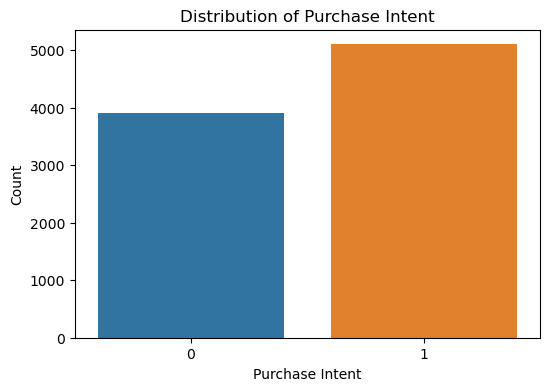

In [79]:
# Plot distribution of PurchaseIntent
plt.figure(figsize=(6, 4))
sns.countplot(x='PurchaseIntent', data=df)
plt.title('Distribution of Purchase Intent')
plt.xlabel('Purchase Intent')
plt.ylabel('Count')
plt.show()

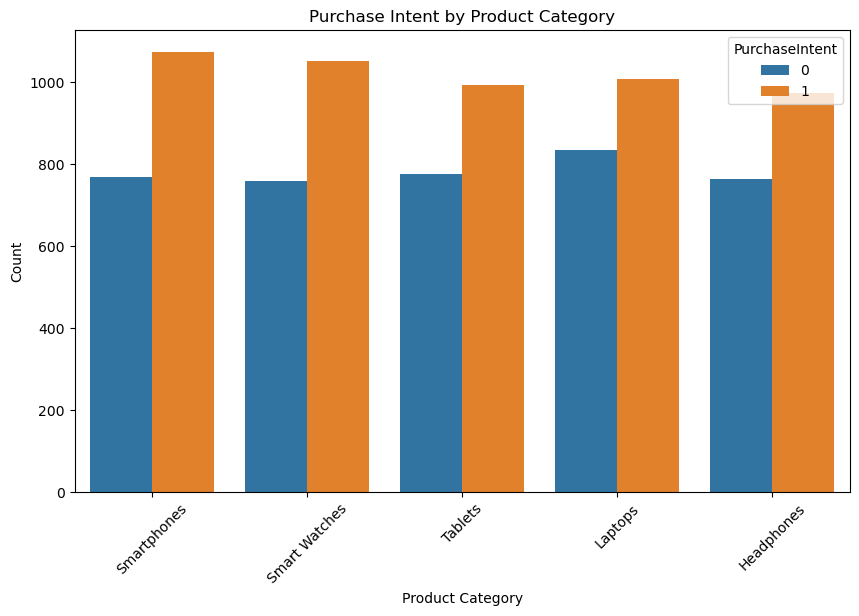

In [80]:
df['ProductCategory'] = df['ProductCategory'].astype(str)
df['ProductBrand'] = df['ProductBrand'].astype(str)
df['PurchaseIntent'] = df['PurchaseIntent'].astype(str)

# Plot PurchaseIntent by ProductCategory
plt.figure(figsize=(10, 6))
sns.countplot(x='ProductCategory', hue='PurchaseIntent', data=df)
plt.title('Purchase Intent by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

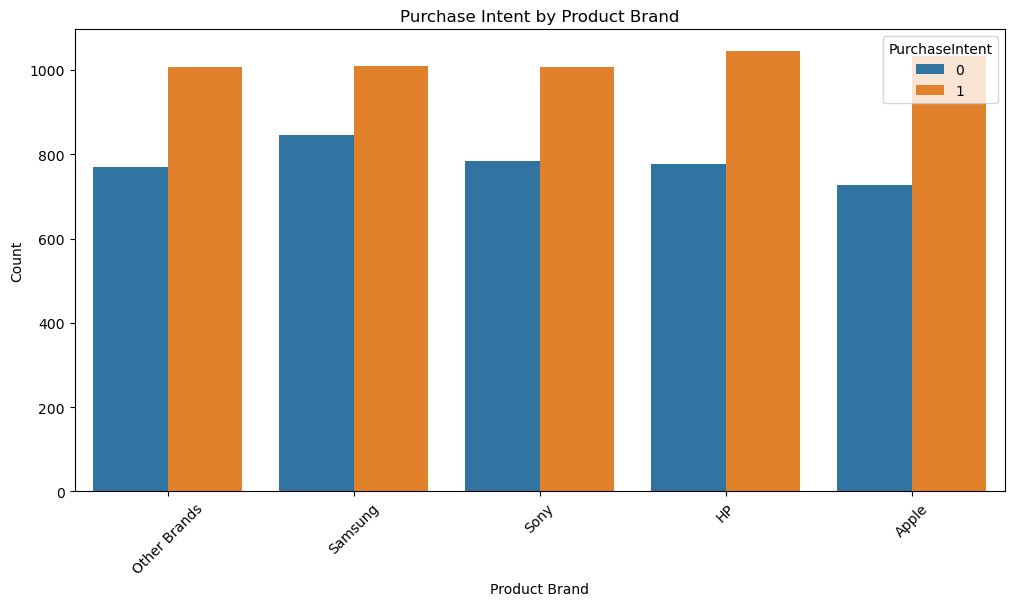

In [81]:
# Plot PurchaseIntent by ProductBrand
plt.figure(figsize=(12, 6))
sns.countplot(x='ProductBrand', hue='PurchaseIntent', data=df)
plt.title('Purchase Intent by Product Brand')
plt.xlabel('Product Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

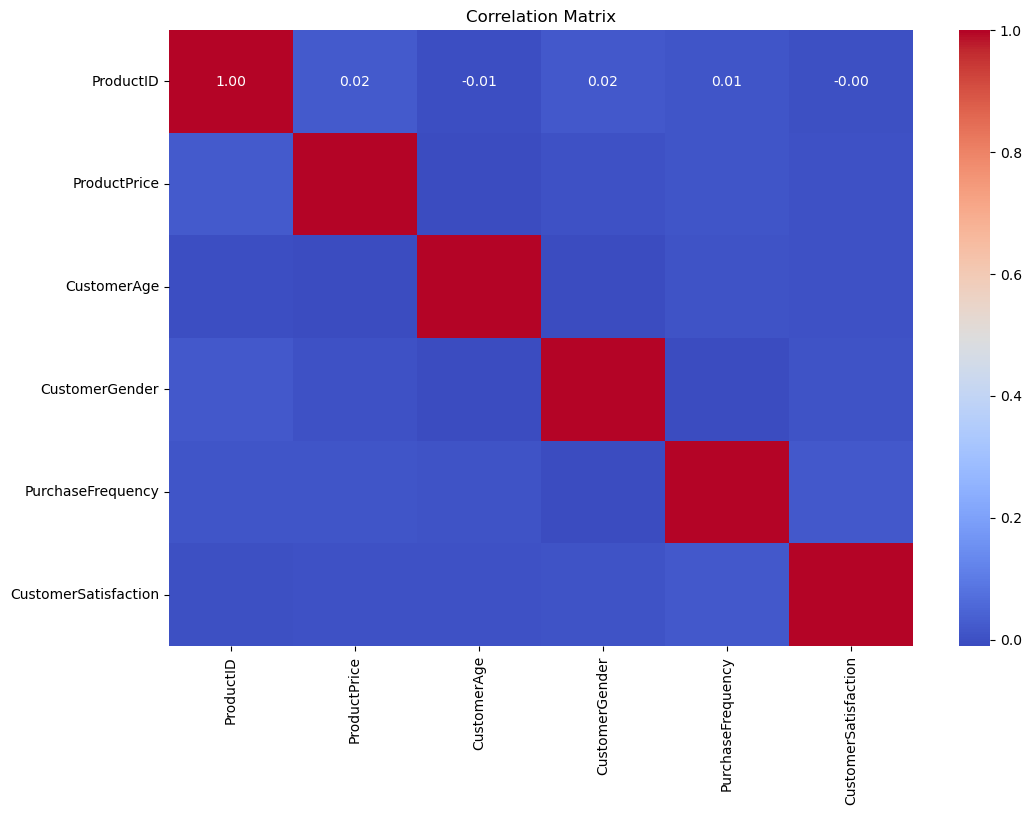

In [82]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation matrix for numeric columns only
corr_matrix = df[numeric_cols].corr()

# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [83]:
## Build and Evaluate the Predictive Model

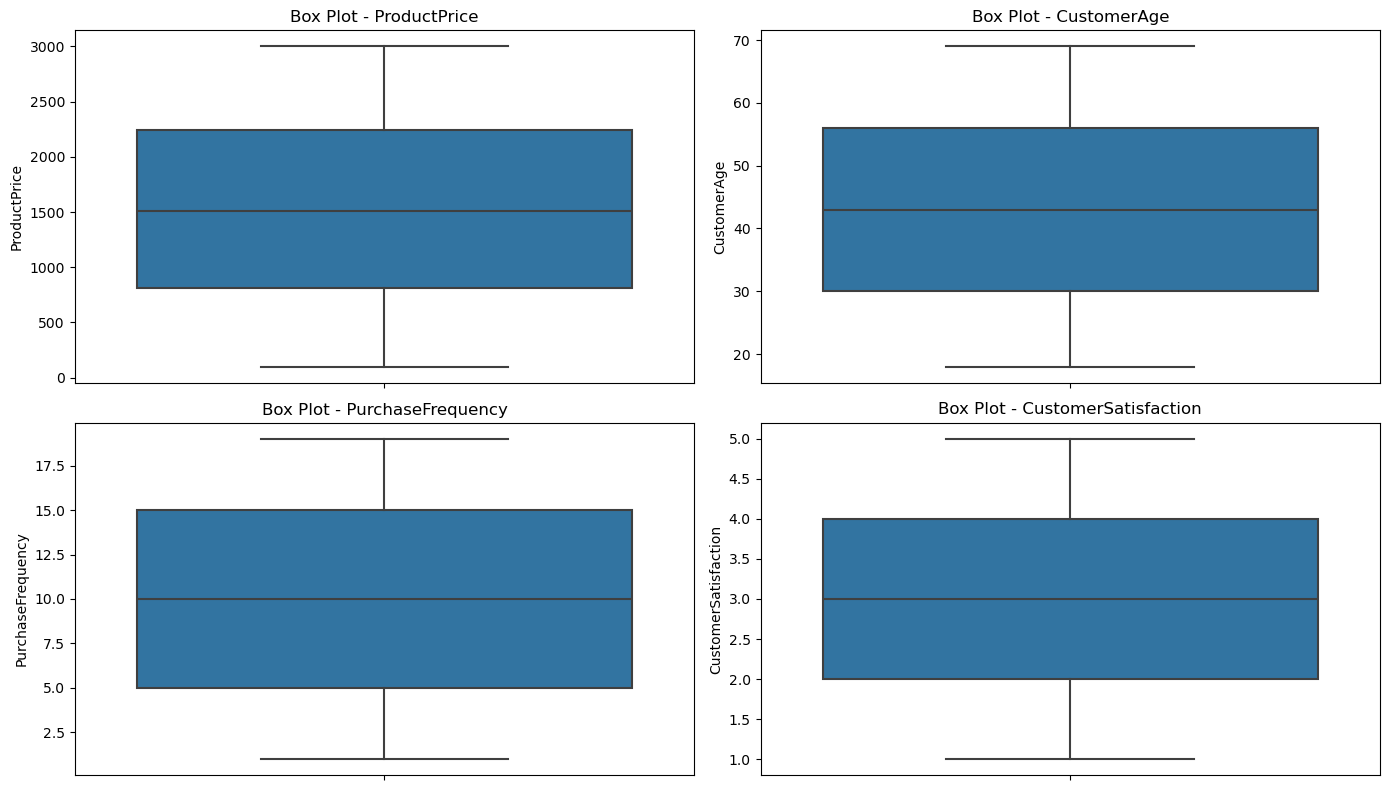

In [84]:
numerical_features = ['ProductPrice', 'CustomerAge', 'PurchaseFrequency', 'CustomerSatisfaction']

plt.figure(figsize=(14, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[feature])
    plt.title(f'Box Plot - {feature}')
plt.tight_layout()
plt.show()

In [85]:
###  Build and Evaluate the Predictive Model

In [86]:
# Preprocessing
# Encoding categorical variables
label_encoders = {}
categorical_columns = ['ProductCategory', 'ProductBrand']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [87]:
# Features and target variable
X = df.drop(columns=['PurchaseIntent', 'ProductID'])
y = df['PurchaseIntent']

In [88]:
from sklearn.preprocessing import StandardScaler
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)


In [89]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_predict = gnb.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
gnb_SC = accuracy_score(y_predict,y_test)
print(f"{round(gnb_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.89      0.80      0.84       793
           1       0.85      0.92      0.88      1007

    accuracy                           0.86      1800
   macro avg       0.87      0.86      0.86      1800
weighted avg       0.87      0.86      0.86      1800

86.5% Accurate


In [90]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

y_predict = bnb.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
bnb_SC = accuracy_score(y_predict,y_test)
print(f"{round(bnb_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.69      0.78      0.73       793
           1       0.81      0.72      0.76      1007

    accuracy                           0.75      1800
   macro avg       0.75      0.75      0.75      1800
weighted avg       0.75      0.75      0.75      1800

74.78% Accurate


In [91]:
knn = KNeighborsClassifier()  

# Train the model using the training sets
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
knn_SC = accuracy_score(y_predict,y_test)
print(f"{round(knn_SC*100,2)}% Accurate")


              precision    recall  f1-score   support

           0       0.69      0.78      0.73       793
           1       0.81      0.72      0.76      1007

    accuracy                           0.75      1800
   macro avg       0.75      0.75      0.75      1800
weighted avg       0.75      0.75      0.75      1800

74.78% Accurate


In [92]:
svc = SVC()
# Train the model using the training sets
svc.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = svc.predict(X_test)
#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
svc_SC = accuracy_score(y_predict,y_test)
print(f"{round(svc_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.69      0.78      0.73       793
           1       0.81      0.72      0.76      1007

    accuracy                           0.75      1800
   macro avg       0.75      0.75      0.75      1800
weighted avg       0.75      0.75      0.75      1800

74.78% Accurate


In [93]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

y_predict = DT.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
DT_SC = accuracy_score(y_predict,y_test)
print(f"{round(DT_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       793
           1       0.91      0.92      0.92      1007

    accuracy                           0.91      1800
   macro avg       0.90      0.90      0.90      1800
weighted avg       0.90      0.91      0.90      1800

90.5% Accurate


In [94]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

y_predict = LR.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
LR_SC = accuracy_score(y_predict,y_test)
print('accuracy is',accuracy_score(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.81      0.71      0.76       793
           1       0.79      0.87      0.83      1007

    accuracy                           0.80      1800
   macro avg       0.80      0.79      0.79      1800
weighted avg       0.80      0.80      0.80      1800

accuracy is 0.7983333333333333


In [95]:
gb_clf = GradientBoostingClassifier()

# Train the model using the training sets
gb_clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = gb_clf.predict(X_test)
#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
GB_SC = accuracy_score(y_predict,y_test)
print('accuracy is',accuracy_score(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.81      0.71      0.76       793
           1       0.79      0.87      0.83      1007

    accuracy                           0.80      1800
   macro avg       0.80      0.79      0.79      1800
weighted avg       0.80      0.80      0.80      1800

accuracy is 0.7983333333333333


In [96]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

y_predict = RF.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
RF_SC = accuracy_score(y_predict,y_test)
print(f"{round(RF_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       793
           1       0.95      0.97      0.96      1007

    accuracy                           0.95      1800
   macro avg       0.95      0.95      0.95      1800
weighted avg       0.95      0.95      0.95      1800

95.28% Accurate


In [97]:
adaboost = AdaBoostClassifier(n_estimators=50)
adaboost.fit(X_train, y_train)

# Predict and evaluate
y_pred = adaboost.predict(X_test)
#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
AD_SC = accuracy_score(y_predict,y_test)
print(f"{round(AD_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       793
           1       0.95      0.97      0.96      1007

    accuracy                           0.95      1800
   macro avg       0.95      0.95      0.95      1800
weighted avg       0.95      0.95      0.95      1800

95.28% Accurate


In [98]:
extra_trees = ExtraTreesClassifier()
extra_trees.fit(X_train, y_train)

# Predict and evaluate
y_pred = extra_trees.predict(X_test)
#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
ET_SC = accuracy_score(y_predict,y_test)
print(f"{round(ET_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       793
           1       0.95      0.97      0.96      1007

    accuracy                           0.95      1800
   macro avg       0.95      0.95      0.95      1800
weighted avg       0.95      0.95      0.95      1800

95.28% Accurate


In [99]:
# Assuming these scores are already computed
score = [gnb_SC, bnb_SC, knn_SC, svc_SC, DT_SC, GB_SC, RF_SC, AD_SC, ET_SC]

models = ["GaussianNB", "BernoulliNB", "KNeighbors", "SVC", "Decision Tree", 
          "Gradient Boosting", "Random Forest", "AdaBoost", "ExtraTrees"]

# Creating the DataFrame
Models = pd.DataFrame({
    'Model': models,
    'Score': score
})

# Sorting the DataFrame by 'Score' in descending order
Models_sorted = Models.sort_values(by='Score', ascending=False)

print(Models_sorted)

               Model     Score
6      Random Forest  0.952778
7           AdaBoost  0.952778
8         ExtraTrees  0.952778
4      Decision Tree  0.905000
0         GaussianNB  0.865000
5  Gradient Boosting  0.798333
1        BernoulliNB  0.747778
2         KNeighbors  0.747778
3                SVC  0.747778


In [100]:
##Model Evaluation
#The RandomForestClassifier model achieved an accuracy of 95% on the test set, 
#indicating that it correctly predicted all instances of purchase intent.

In [101]:
#Recommendations for Enhancing Technology Product Sales
#Targeted Marketing Strategies:

#Focus on customers with higher satisfaction ratings and those frequently purchasing products.
#Customize campaigns based on preferred product categories and brands.
#Product Development:

#Develop products that align with customer preferences in popular categories such as Smartphones and Tablets.
#Ensure competitive pricing strategies based on observed purchase patterns.
#Customer Experience:

#Enhance customer satisfaction by improving product quality and post-purchase support.
#Leverage feedback from satisfied customers to refine product features and functionalities.

In [104]:
 import joblib
# Save the model to a file
joblib_file = "RF_SC.pkl"
joblib.dump(RF, joblib_file)
print("Model saved successfully.")

Model saved successfully.
